In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
meta = pd.read_csv("series-networks/meta.csv")
edgelist = pd.read_csv("series-networks/gameofthrones/edges.csv")
attr = pd.read_csv("series-networks/gameofthrones/attributes.csv")

In [4]:
"""def extract_first_house(s):
    match = re.search(r'([A-Z][a-z]*)(?=[A-Z]|[\[\]\s]|$)', s)
    if match:
        return match.group(1)
    else:
        return None"""

"def extract_first_house(s):\n    match = re.search(r'([A-Z][a-z]*)(?=[A-Z]|[\\[\\]\\s]|$)', s)\n    if match:\n        return match.group(1)\n    else:\n        return None"

In [5]:
"""house_df = attr[attr["house"].notna()]
house_df.loc[:, "house_clean"] = house_df["house"].apply(extract_first_house)
#house_df["house_clean"].unique()"""

'house_df = attr[attr["house"].notna()]\nhouse_df.loc[:, "house_clean"] = house_df["house"].apply(extract_first_house)\n#house_df["house_clean"].unique()'

Csak nagy házakra megcsinálni

In [20]:
major_houses = ["Targaryen", 
                "Stark", 
                "Lannister",
                "Baratheon", 
                #"Greyjoy", 
                "Tully",
                "Arryn", 
                #"Martell",
                  "Tyrell"]

In [21]:
def find_major_house(houses):
    """
    Returns first major house it encounters in houses

    Splits houses str by whitespaces upon non-alphanumeric chars and uppercase letters
    """
    for house in houses:
        cleaned_house = ''
        
        for i, char in enumerate(house):
            if i == 0:
                cleaned_house += char
            elif char.isupper():
                cleaned_house += " " + char
            elif not char.isalpha():
                cleaned_house += " " + char
            else:
                cleaned_house += char
        
        house_names = cleaned_house.split()
        
        for name in house_names:
            if name in major_houses:
                return name
    
    return None


In [22]:
house_df = attr[attr["house"].notna()]
house_df["major_house"] = house_df["house"].str.split().apply(find_major_house)
house_df = house_df[house_df["major_house"].notna()]
#house_df[house_df["house"] == "FreyTully (by marriage)"]
display(house_df)

C:\Users\klapc6\AppData\Local\Temp\ipykernel_11556\3262595721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df["major_house"] = house_df["house"].str.split().apply(find_major_house)


,id,title,image,birth,death,house,affiliation,titles,culture,father,...,spouse,religion,issue,aka,arms,species,lovers,siblings,family,major_house
0,Aemon,Aemon,NaN,"Aemon Targaryen[1]202 AC[a]Red Keep, King's La...","302 AC[c] (aged 100)Castle Black, the Gift[2]",Targaryen[1] (renounced),Order of Maesters[3]Night's Watch[3],Prince[1] (formerly)Maester[3],Valyrian[1],{Maekar I Targaryen}[1],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Targaryen
10,Jon_Arryn,Jon Arryn,NaN,"The Eyrie, the Vale of Arryn[a]","298 AC[b]Red Keep, King's Landing[1]",Arryn[1],House Targaryen[2] (formerly)House Baratheon o...,Lord of the EyrieDefender of the ValeWarden of...,Valemen[1],{Jasper Arryn}[citation needed],...,{Lysa Tully}[1],Faith of the Seven[1],Robin Arryn[1],NaN,NaN,NaN,NaN,NaN,NaN,Arryn
11,Lysa_Arryn,Lysa Arryn,NaN,"Lysa Tully[1]Riverrun, the Riverlands[a]","301 AC[b]The Eyrie, the Vale of Arryn[2]",Tully[1]Arryn[3] (by marriage)Baelish[4] (by m...,NaN,NaN,Rivermen[1],{Hoster Tully}[5],...,{Jon Arryn}[3] (1st husband){Petyr Baelish}[4]...,Faith of the Seven[4],Robin Arryn[3],NaN,NaN,NaN,NaN,NaN,NaN,Tully
12,Robin_Arryn,Robin Arryn,NaN,"289 AC[a] (age 16)[b]Red Keep, King's Landing[c]",NaN,Arryn[1],House Royce[2] (ward),Lord of the Eyrie[3]Defender of the Vale[4]War...,Valemen[3],{Jon Arryn}[1],...,NaN,NaN,NaN,Sweetrobin[3],NaN,NaN,NaN,NaN,NaN,Arryn
23,Edric_Baratheon,Edric Baratheon,NaN,"Dragonstone, the Crownlands[1]","Dragonstone, the Crownlands[1]",Baratheon of Dragonstone[1],NaN,NaN,NaN,{Stannis Baratheon}[1],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baratheon
24,Gendry_Baratheon,Gendry Baratheon,NaN,"Gendry[a]Flea Bottom, King's Landing[1]",NaN,Baratheon[2] (legitimized),Tobho Mott[3] (formerly)House Targaryen[2] (fo...,Lord of Storm's End[2]Lord Paramount of the St...,Crownlander[3],{Robert I Baratheon}[3],...,NaN,NaN,NaN,NaN,NaN,NaN,Arya Stark[5] (briefly),NaN,NaN,Baratheon
25,Joffrey_Baratheon,Joffrey I Baratheon,NaN,"282 AC[a]Red Keep, King's Landing[b]","301 AC[c] (aged 19)Red Keep, King's Landing[1]",Baratheon of King's Landing[2]Lannister[3],NaN,King of the Andals and the First Men[3]Lord of...,Crownlander[2],{Jaime Lannister}[3] (biological){Robert I Bar...,...,{Margaery Tyrell}[1] (unconsummated),Faith of the Seven[5],NaN,Joff[4],"Per pale gold and red, a black crowned stag an...",NaN,NaN,NaN,NaN,Baratheon
26,Myrcella_Baratheon,Myrcella Baratheon,NaN,"288 AC[a]Red Keep, King's Landing[1]","302 AC[b] (aged 14)Narrow Sea, near Dorne[2]",Baratheon of King's Landing[3],House Martell[4] (ward),Princess[5],Crownlander[3],{Jaime Lannister}[6] (biological){Robert I Bar...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baratheon
27,Petyr_Baratheon,Petyr Baratheon,NaN,"Dragonstone, the Crownlands[1]","Dragonstone, the Crownlands[1]",Baratheon of Dragonstone[1],NaN,NaN,NaN,{Stannis Baratheon}[1],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baratheon
28,Renly_Baratheon,Renly Baratheon,NaN,"Storm's End, the Stormlands[a]","299 AC[b]Near Storm's End, the Stormlands[1]",Baratheon[2],House Baratheon of King's Landing[3] (formerly...,Lord of Storm's EndLord Paramount of the Storm...,Stormlander[2],{Steffon Baratheon}[2],...,{Margaery Tyrell}[5] (unconsummated),NaN,NaN,King Renly I[4] (self-styled)The King in Highg...,"Green, a crowned gold stag's head contourny[5]",NaN,{Loras Tyrell}[6],NaN,NaN,Baratheon


In [23]:
edgelist = edgelist[edgelist["from"] != edgelist["to"]]

In [24]:
id_house = dict(zip(house_df["id"], house_df["major_house"]))

houses_edgelist = edgelist
houses_edgelist["from_house"] = houses_edgelist["from"].map(id_house)
houses_edgelist["to_house"] = houses_edgelist["to"].map(id_house)

houses_edgelist.dropna(inplace=True)
#houses_edgelist = houses_edgelist.drop(["from", "to"], axis=1)
houses_edgelist[houses_edgelist["from_house"] == "Baratheon"].head(150)
len(houses_edgelist)

1131

In [25]:
houses_edgelist.loc[(houses_edgelist["from_house"] == "Baratheon") &
                    (houses_edgelist["to_house"] == "Baratheon")]

,from,to,from_house,to_house
341,Edric_Baratheon,Stannis_Baratheon,Baratheon,Baratheon
342,Edric_Baratheon,Selyse_Baratheon,Baratheon,Baratheon
343,Edric_Baratheon,Shireen_Baratheon,Baratheon,Baratheon
344,Edric_Baratheon,Tommard_Baratheon,Baratheon,Baratheon
345,Edric_Baratheon,Petyr_Baratheon,Baratheon,Baratheon
...,...,...,...,...
897,Tommen_Baratheon,Gendry_Baratheon,Baratheon,Baratheon
899,Tommen_Baratheon,Petyr_Baratheon,Baratheon,Baratheon
900,Tommen_Baratheon,Tommard_Baratheon,Baratheon,Baratheon
901,Tommen_Baratheon,Edric_Baratheon,Baratheon,Baratheon


In [26]:
heatmap_data = pd.DataFrame(0, index=major_houses, columns=major_houses)

for _, row in houses_edgelist.iterrows():
    heatmap_data.loc[row["from_house"], row["to_house"]] += 1

heatmap_data

,Targaryen,Stark,Lannister,Baratheon,Tully,Arryn,Tyrell
Targaryen,30,32,19,20,4,3,4
Stark,39,91,36,31,45,13,10
Lannister,17,42,90,45,17,3,26
Baratheon,29,34,52,129,7,4,25
Tully,6,41,20,7,30,10,1
Arryn,3,10,6,6,9,2,0
Tyrell,5,11,21,23,3,0,20


Biztos, hogy jó az edgelist?

Standardize

In [27]:
def standardize(df, N):
    #N = len(df)
    stand_df = df.copy()
    stand_df = stand_df.astype(float)

    for row_i, row in df.iterrows():
        row_sum = row.sum()

        for col_i, cell_value in enumerate(row):
            col_sum = df.iloc[:, col_i].sum()
            stand_df.iloc[row_i, col_i] = (cell_value * N) / (row_sum * col_sum)

    return stand_df
    #new_cell_value = (cell_value * N)


heatmap_data = standardize(heatmap_data, len(edgelist))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [28]:
def standardize_(df, N):
    row_sums = df.sum(axis=1)
    col_sums = df.sum(axis=0)
    denominator = row_sums.values.reshape(-1, 1) * col_sums.values.reshape(1, -1)
    print(denominator)
    print(row_sums)
    print(col_sums)
    
    return (df * N) / denominator

stand_heatmap_data = standardize_(heatmap_data, len(edgelist))

[[14448 29232 27328 29232 12880  3920  9632]
 [34185 69165 64660 69165 30475  9275 22790]
 [30960 62640 58560 62640 27600  8400 20640]
 [36120 73080 68320 73080 32200  9800 24080]
 [14835 30015 28060 30015 13225  4025  9890]
 [ 4644  9396  8784  9396  4140  1260  3096]
 [10707 21663 20252 21663  9545  2905  7138]]
Targaryen    112
Stark        265
Lannister    240
Baratheon    280
Tully        115
Arryn         36
Tyrell        83
dtype: int64
Targaryen    129
Stark        261
Lannister    244
Baratheon    261
Tully        115
Arryn         35
Tyrell        86
dtype: int64


Ezeket az értékeket le kell még standardizálni

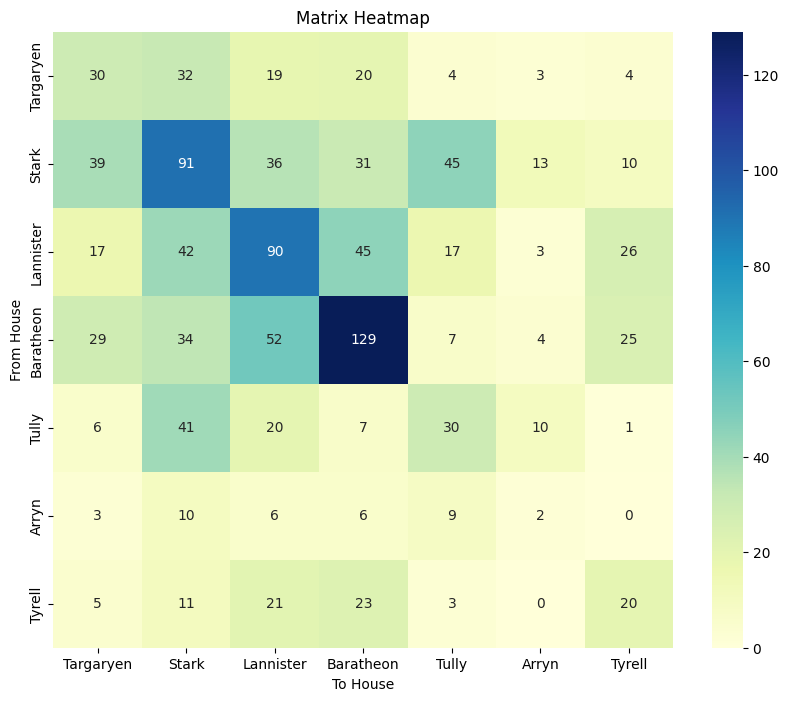

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Matrix Heatmap')
plt.xlabel('To House')
plt.ylabel('From House')
plt.show()

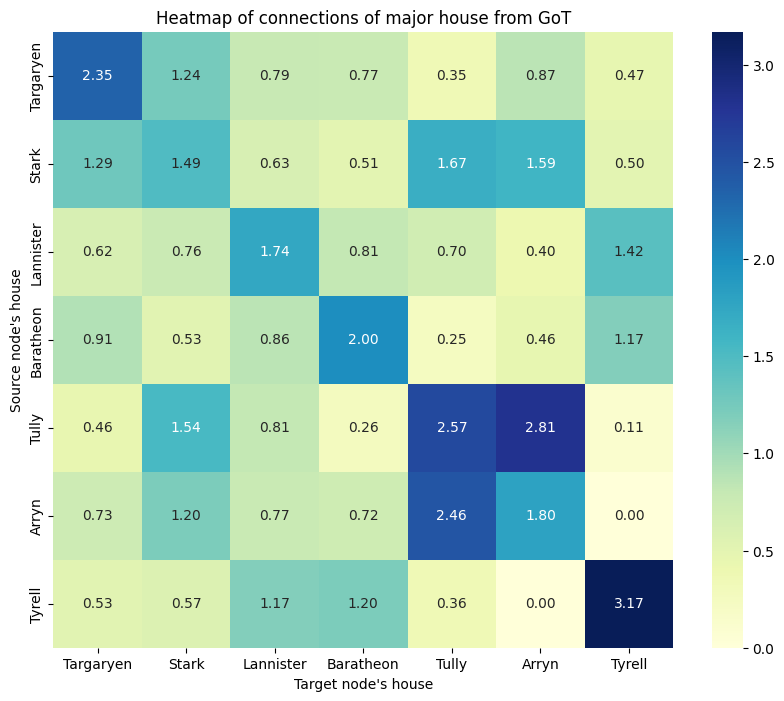

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(stand_heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Heatmap of connections of major house from GoT')
plt.xlabel("Target node's house")
plt.ylabel("Source node's house")

plt.savefig("got-houses-heatmap.png")

plt.show()